In [1]:
import numpy as np
import pandas as pd

In [2]:
#header来指定标题的行，默认为0，如果没有header就令为None
data = pd.read_csv("Iris.csv", header=0)
data.head()#可以指定head的数量 默认为五行
#shift + tab 快捷键展示方法的文档信息 
#ctrl + shift在本段快速运行 
#shift + enter运行并切换到下一行
data.tail()#同上不过是从末尾
data.sample(10)#随机抽取样本默认为1
#进行映射分类,变为数值类型
data["Species"] = data["Species"].map({"Iris-virginica" : 0,"Iris-versicolor" : 1,"Iris-setosa" : 2 })
#删除不需要的列 在副本上进行的操作 没有更改原有的数据集
data.drop("Id",axis=1,inplace =True)#inplace =True这个会修改原来的数据集
#观察重复的值 any()只要有一个
data.duplicated().any()
#删除重复的数据
data.drop_duplicates(inplace=True)
#查看各个类别的鸢尾花有多少条记录
data["Species"].value_counts()

Species
1    50
0    49
2    48
Name: count, dtype: int64

In [21]:
class KNN:
    """ python实现k近邻算法 分类 """
    def __init__(self, k):
        """初始化方法 
        
        Parameters: 
        -----------
        k : int 
            邻居的个数
        """
        self.k = k

    def fit(self, X, y):
        """训练方法
        
        Parameters:
        ------------
        X : 类数组类型 List dataframe...形状为:[样本数量，特征数量]
            待训练的样本特征
            
        y : 类数组类型， 形状为：[样本数量]
            每个样本的目标值(标签)
        """

        # 将X转换成ndarray数组类型 ndarray 是 NumPy 库中最核心的数据结构，全称为 N-dimensional array（N 维数组）
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        
    def predict(self, X):
        """根据参数传递的样本，预测样本数据
        Parameters
        ------
        X : 类数组类型 List dataframe...形状为:[样本数量，特征数量]
            待训练的样本特征
        Returns
        ------
        result : 数组类型
                预测的结果
        """
        X = np.asarray(X)
        result = []
        # 每次取出来一行数据 
        for x in X: # 这里的X是测试集 self.X是带训练数据集
            #向量减法 当X中不止一组的时候 会发生广播扩展 欧氏距离 axis代表求和的维度
            o_dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            #会返回排序后的数据在原数组中的位置的数组
            index = o_dis.argsort() 
            # 进行截断 只要前 k 个
            index = index[:self.k]
            # 返回数组中每个元素出现的次数 元素必须为非负整数 主要用于统计非负整数数组中每个整数出现的次数
            count = np.bincount(self.y[index])
            # 返回ndarray数组中值最大的索引 这个就是出现次数最多的元素
            result.append(count.argmax())
        return np.asarray(result)
        
    def predict2(self, X):
        """根据参数传递的样本，预测样本数据
        Parameters
        ------
        X : 类数组类型 List dataframe...形状为:[样本数量，特征数量]
            待训练的样本特征
        Returns
        ------
        result : 数组类型
                预测的结果
        """
        X = np.asarray(X)
        result = []
        # 每次取出来一行数据 
        for x in X: # 这里的X是测试集 self.X是带训练数据集
            #向量减法 当X中不止一组的时候 会发生广播扩展 欧氏距离 axis代表求和的维度
            o_dis = np.sqrt(np.sum((x - self.X) ** 2, axis=1))
            #会返回排序后的数据在原数组中的位置的数组
            index = o_dis.argsort() 
            # 进行截断 只要前 k 个
            index = index[:self.k]
            # 返回数组中每个元素出现的次数 元素必须为非负整数 主要用于统计非负整数数组中每个整数出现的次数
            count = np.bincount(self.y[index], weights= 1 / o_dis[index])
            # 返回ndarray数组中值最大的索引 这个就是出现次数最多的元素
            result.append(count.argmax())
        return np.asarray(result)
            

In [37]:
# 提起每个类别的鸢尾花数据
t0 = data[data["Species"] == 0]
t1 = data[data["Species"] == 1]
t2 = data[data["Species"] == 2]
# sample方法 随机取样 对每个类别数据进行洗牌
t0 = t0.sample(len(t0), random_state=0)
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
# 构建训练集和测试集
# 表示行数40行 列数是除了列数之外的一行 -1代表倒着数一位 
train_X = pd.concat([t0.iloc[:40, :-1], t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t0.iloc[:40, -1], t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t0.iloc[40:, :-1], t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t0.iloc[40:, -1], t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)
knn = KNN(k=3)
# 进行训练
knn.fit(train_X, train_y)
# 进行测试 获得测试结果
result = knn.predict(test_X)
#display(result)
#display(test_y)

display(np.sum(result == test_y))
display(np.sum(result == test_y)/ len(result)) 

26

0.9629629629629629

In [38]:
# 考虑权重后进行测试
result2 = knn.predict2(test_X)
display(np.sum(result2 == test_y))
display(np.sum(result2 == test_y)/ len(result2)) 

26

0.9629629629629629

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt #数学绘图库

In [6]:
# 默认情况下 matplotlib不支持中文显示 
#rc 是 “runtime configuration”（运行时配置）的缩写，Params 是 “parameters”（参数）的缩写，所以 rcParams 代表运行时配置参数。
# 设置字体为黑体 以支持中文显示
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

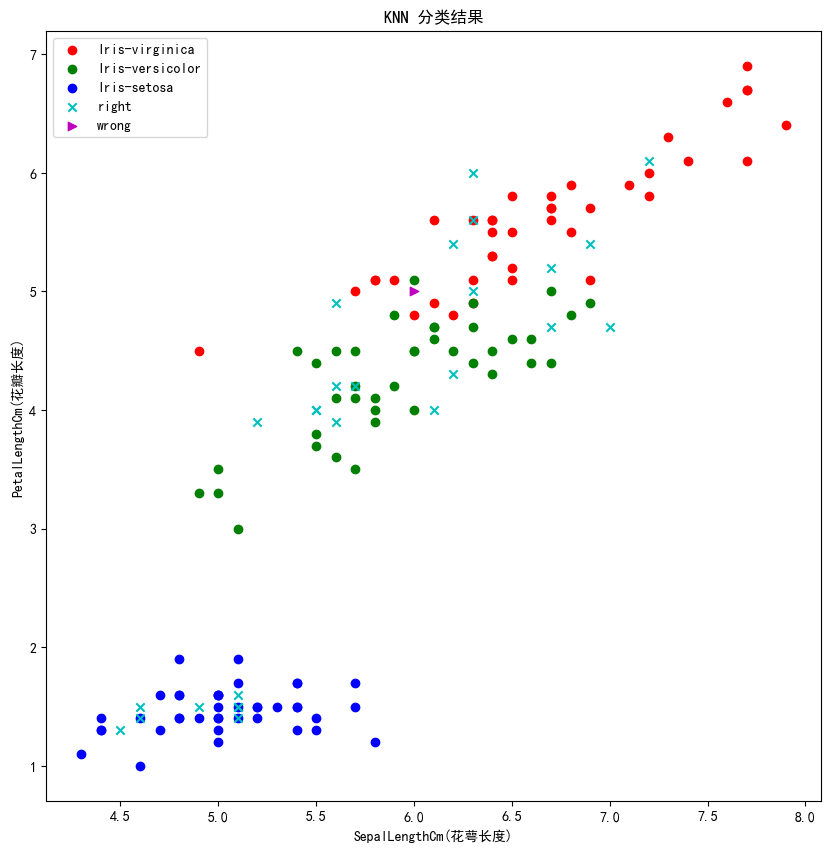

In [11]:
# {"Iris-virginica" : 0,"Iris-versicolor" : 1,"Iris-setosa" : 2 }
# 设置画布的大小
plt.figure(figsize=(10, 10))
# 选取两个维度 绘制训练集数据
plt.scatter(x=t0["SepalLengthCm"][:40], y=t0["PetalLengthCm"][:40], color="r", label="Iris-virginica")
plt.scatter(x=t1["SepalLengthCm"][:40], y=t1["PetalLengthCm"][:40], color="g", label="Iris-versicolor")
plt.scatter(x=t2["SepalLengthCm"][:40], y=t2["PetalLengthCm"][:40], color="b", label="Iris-setosa")
# 绘制测试集数据
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right["SepalLengthCm"], y=right["PetalLengthCm"], color="c", marker="x", label="right")
plt.scatter(x=wrong["SepalLengthCm"], y=wrong["PetalLengthCm"], color="m", marker=">", label="wrong")
plt.xlabel("SepalLengthCm(花萼长度)")
plt.ylabel("PetalLengthCm(花瓣长度)")
plt.title("KNN 分类结果")
plt.legend(loc="best") #legend图例
plt.show()

In [9]:
np.bincount([0, 1, 1, 0, 1], weights=[0.5, 0.3, 0.2, 0.1, 0.0])

array([0.6, 0.5])